In [1]:
#EXPLORING GLOBAL WEATHER TRENDS

#LOAD FILES
#CREATE DATAFRAMES
#ANALYSE
#PLOT RESULTS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = r'C:\Users\omara\Documents\DatAn\Data Analysis\DAND\proj1\data\\'
file_oslo = 'oslo_nonnull.csv'
file_world = 'global_temp.csv'
def readcsv(filename):
    return pd.read_csv(path+filename)


In [3]:
df_oslo = readcsv(file_oslo)
df_world = readcsv(file_world)

In [4]:
#print(df_oslo.iloc[-10:])
#print(df_world.tail())

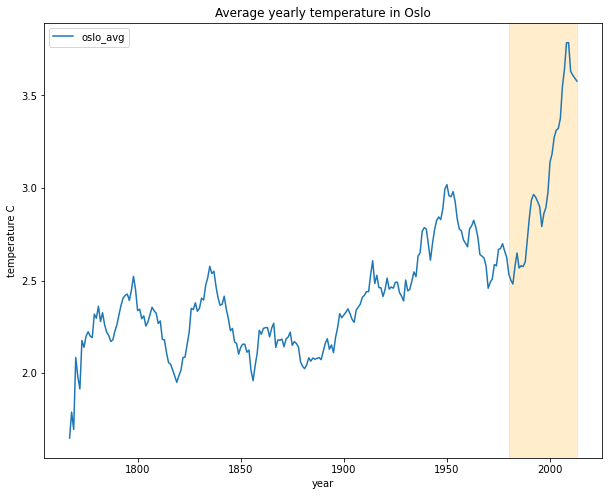

In [5]:
dt = 20
def movingAvg(a):
    MA = np.zeros(len(a))
    for i in range(dt,len(a+1)):
       MA[i]= np.sum(a[i-dt:i+1])/dt
    return MA

MA = pd.DataFrame({
    'year': df_oslo['year'], 
    'oslo_avg': movingAvg(df_oslo['oslo_avg'].values)
}).iloc[dt:]

o_plot = MA.plot(x='year', figsize=(10,8), title='Average yearly temperature in Oslo')
o_plot.set(ylabel='temperature C')
o_plot.axvspan(1980, 2013, color='orange', alpha=0.2)

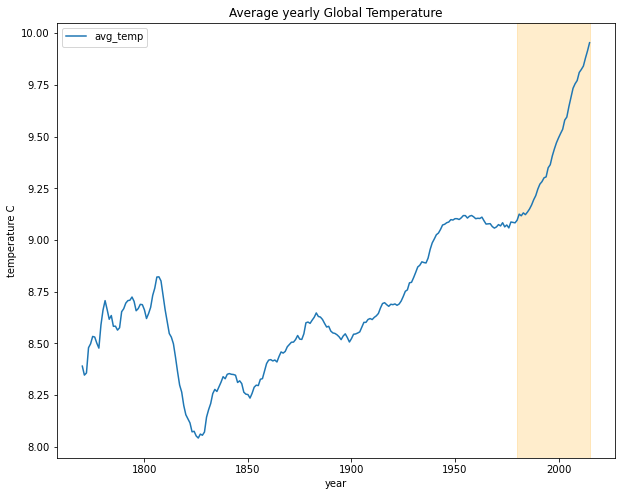

In [6]:
MA_g = pd.DataFrame({
    'year': df_world['year'], 
    'avg_temp': movingAvg(df_world['avg_temp'].values)
}).iloc[dt:]

g_plot = MA_g.plot(x='year', figsize=(10,8), legend='global temperature', title='Average yearly Global Temperature')
g_plot.set(ylabel='temperature C')
g_plot.axvspan(1980, 2015, color='orange', alpha=0.2)



In [19]:
MA_comb = MA_g.merge(MA, how='inner', on='year')
#MA.iloc[-60:]

<AxesSubplot:title={'center':'Average yearly temperature World and Oslo'}, xlabel='year'>

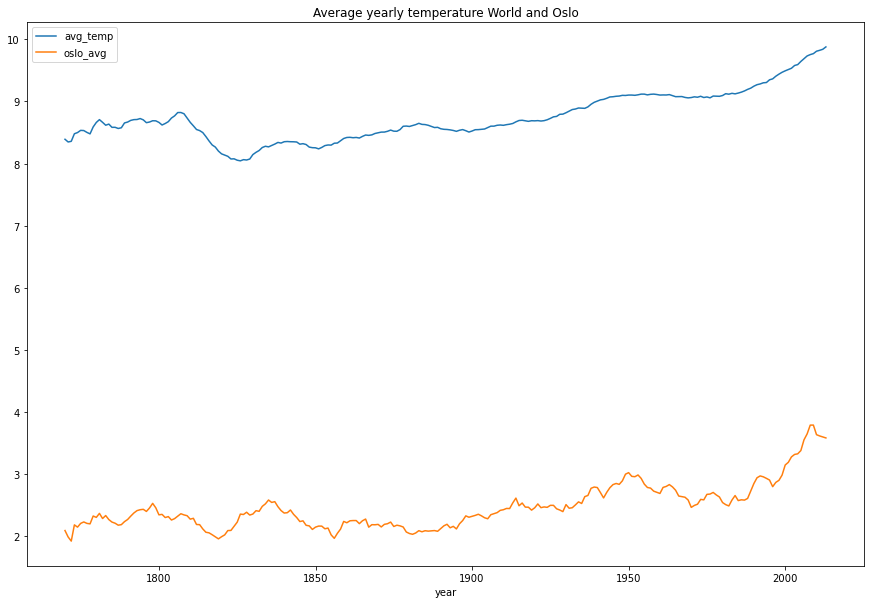

In [169]:
MA_comb.plot(x='year', subplots=False, figsize=(15,10), title = 'Average yearly temperature World and Oslo')

In [170]:
print(MA_comb.head())
print(MA_comb.tail())


   year  avg_temp  oslo_avg
0  1770    8.3905    2.0850
1  1771    8.3470    1.9815
2  1772    8.3575    1.9150
3  1773    8.4795    2.1765
4  1774    8.4985    2.1400
     year  avg_temp  oslo_avg
239  2009    9.7705    3.7845
240  2010    9.8095    3.6300
241  2011    9.8240    3.6095
242  2012    9.8405    3.5940
243  2013    9.8790    3.5775


In [55]:
def mapper(y):
    x = np.copy(y)
    x[x > 0] = 1
    x[x < 0] = -1
    return x
    
MA_diff = (MA['oslo_avg'].values[1:] - MA['oslo_avg'].values[:-1])
MAg_diff = (MA_g['avg_temp'].values[1:] - MA_g['avg_temp'].values[:-1])

MA_change = mapper(MA_diff)
MAg_change = mapper(MAg_diff)

In [57]:
##Changes in temp since the 1970s for Oslo
MA70s = MA_diff[:100]#[-44:]
print('temp increase:', np.mean(MA70s[MA70s > 0]))
print('temp decrease:', np.mean(MA70s[MA70s < 0]))

print('number of increases:', len(MA70s[MA70s > 0]))
print('number of decreases:', len(MA70s[MA70s < 0]))


temp increase: 0.05575490196078436
temp decrease: -0.04904166666666671
number of increases: 51
number of decreases: 48


In [58]:
##Changes in temp since the 1970s for World
MAg70s = MAg_diff[:100]#[-46:]
print('temp increase:', np.mean(MAg70s[MAg70s > 0]))
print('temp decrease:', np.mean(MAg70s[MAg70s < 0]))

print('number of increases:', len(MAg70s[MAg70s > 0]))
print('number of decreases:', len(MAg70s[MAg70s < 0]))

temp increase: 0.027500000000000024
temp decrease: -0.028787234042553223
number of increases: 53
number of decreases: 47


In [59]:
#CUMSUM of yearly (moving avg) changes
MA_cumsum = np.cumsum(MA_change)
MAg_cumsum = np.cumsum(MAg_change)

[Text(0.5, 1.0, 'Oslo temperature change'),
 Text(0.5, 0, 'year'),
 Text(0, 0.5, 'cumsum of changes')]

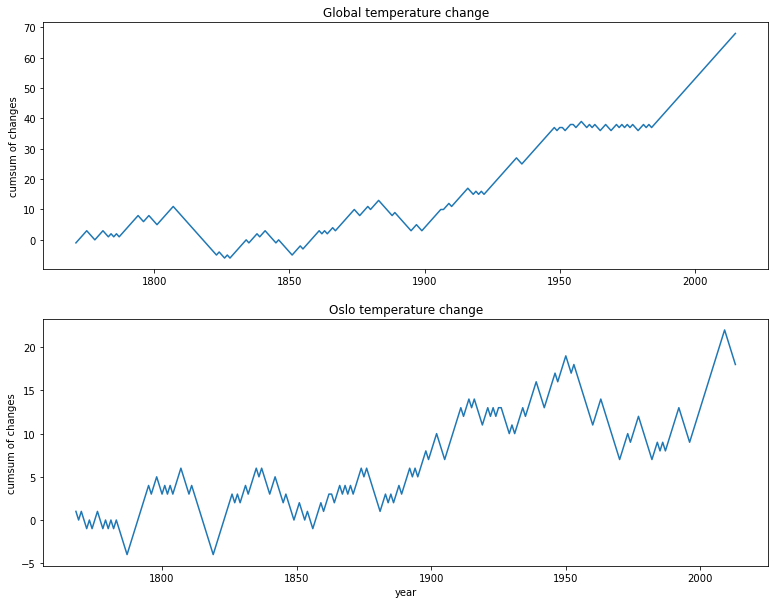

In [60]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(13,10))
ax1.plot(MA_g['year'].values[1:], MAg_cumsum)
ax1.set(title='Global temperature change',  ylabel='cumsum of changes')
ax2.plot(MA['year'].values[1:], MA_cumsum)
ax2.set(title='Oslo temperature change', xlabel='year',  ylabel='cumsum of changes')
